In [35]:
from PIL import Image
from torchvision import transforms
import numpy as np

from carla_drl.semantic_segmentation.unet import UNet
from carla_drl.semantic_segmentation.dataset import cityscapes_palette_to_labels, labels_to_cityscapes_palette

In [3]:
ss_model_path = "path/to/ss_model.pth"
model = UNet(num_classes=13)
model.load(ss_model_path)

In [40]:
image = Image.open("../data/rgb/Town02_Opt/ClearNoon/000.png").convert("RGB")
gt_im = Image.open("../data/semseg/Town02_Opt/ClearNoon/000.png").convert("RGB")

In [41]:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
transform = transforms.Compose([
    transforms.Resize((80, 160)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

In [42]:
image_tensor = transform(image)

In [47]:
outputs = model(image_tensor.unsqueeze(0))
prediction = outputs.data.max(1)[1].squeeze_(1).cpu().numpy()
prediction_im = labels_to_cityscapes_palette(prediction[0])
gt = cityscapes_palette_to_labels(np.array(gt_im))

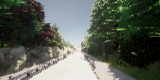

In [48]:
image

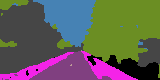

In [49]:
prediction_im

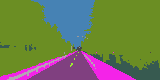

In [50]:
gt_im